### Import library Scikit-fuzzy

In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.1 MB/s eta 0:00:00


In [2]:
# Additional Libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

### Declaration of input & output variables using `ctrl.Antecedent` and `ctrl.Consequent`


In [3]:
# Input variables
transaction = ctrl.Antecedent(np.arange(0, 11, 1), 'transaction')
total_spending = ctrl.Antecedent(np.arange(0, 3000000, 500000), 'total_spending')
discount = ctrl.Consequent(np.arange(0, 31, 1), 'discount')

### Membership functions for categorical variables in trapezoidal form

In [4]:
# Kategori fungsi keanggotaan transaction
transaction['Low'] = fuzz.trapmf(transaction.universe, [0, 0, 2, 4])
transaction['Normal'] = fuzz.trapmf(transaction.universe, [3, 4, 6, 7])
transaction['High'] = fuzz.trapmf(transaction.universe, [6, 8, 10, 10])

# Total spending membership function categories
total_spending['Low'] = fuzz.trapmf(total_spending.universe, [0, 0, 500000, 1000000])
total_spending['Normal'] = fuzz.trapmf(total_spending.universe, [750000, 1250000, 1750000, 2250000])
total_spending['High'] = fuzz.trapmf(total_spending.universe, [2000000, 2500000, 3000000, 3000000])

# Discount membership function categories
discount['Small'] = fuzz.trapmf(discount.universe, [0, 0, 5, 10])
discount['Medium'] = fuzz.trapmf(discount.universe, [8, 12, 18, 22])
discount['Big'] = fuzz.trapmf(discount.universe, [20, 25, 30, 30])

### Fuzzy rules with `ctrl.Rule`

In [6]:
# Rule for Low transaction
rule1 = ctrl.Rule(transaction['Low'] & total_spending['Low'], discount['Small']) # If transaction and total spending are 'Low', then the discount is 'Small'
rule2 = ctrl.Rule(transaction['Low'] & total_spending['Normal'], discount['Small']) # If transaction is 'Low' and total spending is 'Normal', then the discount is 'Small'
rule3 = ctrl.Rule(transaction['Low'] & total_spending['High'], discount['Medium']) # If transaction is 'Low' and total spending is 'High', then the discount is 'Normal'

# Rule for Normal transaction
rule4 = ctrl.Rule(transaction['Normal'] & total_spending['Low'], discount['Small']) # If transaction is 'Normal' and total spending is 'Low', then the discount is 'Small'
rule5 = ctrl.Rule(transaction['Normal'] & total_spending['Normal'], discount['Medium']) # If transaction and total spending are 'Normal', then the discount is 'Normal'
rule6 = ctrl.Rule(transaction['Normal'] & total_spending['High'], discount['Big']) # If transaction is 'Normal' and total spending is 'High', then the discount is 'Big'

# Rule for High transaction
rule7 = ctrl.Rule(transaction['High'] & total_spending['Low'], discount['Medium']) # If transaction is 'High' and total spending is 'Low', then the discount is 'Normal'
rule8 = ctrl.Rule(transaction['High'] & total_spending['Normal'], discount['Big']) # If transaction is 'High' and total spending is 'Normal', then the discount is 'Big'
rule9 = ctrl.Rule(transaction['High'] & total_spending['High'], discount['Big']) # If transaction and total spending are 'High', then the discount is 'Big'

### Fuzzy control system using `ctrl.ControlSystem`

In [7]:
# The fuzzy control system is created by combining the predefined rules
discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# The fuzzy control system simulation is performed using ControlSystemSimulation
discount_simulation = ctrl.ControlSystemSimulation(discount_ctrl)

### Visualize the membership function graph using `view()`

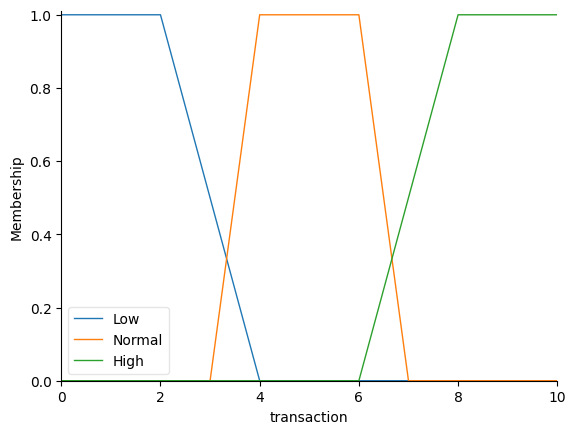

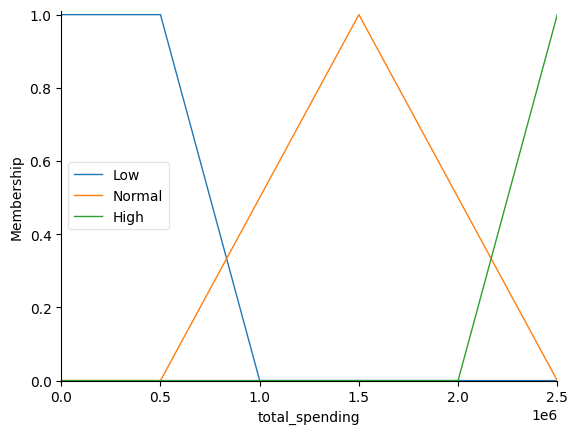

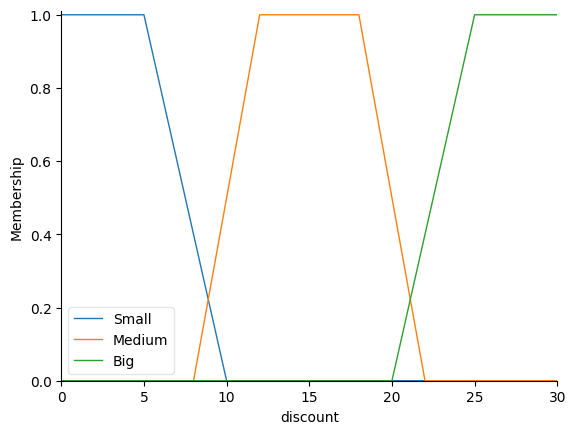

In [8]:
# Display the graph for each membership function
transaction.view()
total_spending.view()
discount.view()
plt.show()

In [9]:
# Function for testing new data
def calculate_discount(transaction_val, belanja_val):
    discount_simulation.input['transaction'] = transaction_val
    discount_simulation.input['total_spending'] = belanja_val
    discount_simulation.compute()
    return discount_simulation.output['discount']

# Declare the new data values to be tested
result_discount = calculate_discount(7, 1500000)
print(f"Discount given: {result_discount:.2f}%")

Discount given: 25.60%


**The discount obtained from a purchase frequency of 7 transactions per month and a total spending amount of 1,500,000 is 25.6%.**
(IDR)